# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [165]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

646

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [167]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

#Create a variable to count records
record = 0

# set up lists to hold reponse info
city_nm = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
country = []
dt = []

#Performing successive API calls by looping through our list of cities

print("Beginning Data Retrieval")
print("----------------------------------")

for city in cities:

    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    # Get weather data
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()

    if weather_data["cod"] == '404':

        print(f"City not found. Skipping...")

    else:

        if record == 0:
            # Get city name from JSON response
            city_name = weather_data["name"]

            # Print city name being processed
            pprint(f"Processing Record {1 + record} | {city_name}")
            
            # Loop through the list of cities and perform a request for data on each
            city_nm.append(weather_data['name'])
            lat.append(weather_data['coord']['lat'])
            lng.append(weather_data['coord']['lon'])
            max_temp.append(weather_data['main']['temp_max'])
            humidity.append(weather_data['main']['humidity'])
            cloudiness.append(weather_data['clouds']['all'])
            wind_spd.append(weather_data['wind']['speed'])
            country.append(weather_data['sys']['country'])
            dt.append(weather_data['dt'])
            
        else:
            # Get city name from JSON response
            city_name = weather_data["name"]

            # Get the temperature from the response
            pprint(f"Processing Record {1 + record} | {city_name}")
            
            city_nm.append(weather_data['name'])
            lat.append(weather_data['coord']['lat'])
            lng.append(weather_data['coord']['lon'])
            max_temp.append(weather_data['main']['temp_max'])
            humidity.append(weather_data['main']['humidity'])
            cloudiness.append(weather_data['clouds']['all'])
            wind_spd.append(weather_data['wind']['speed'])
            country.append(weather_data['sys']['country'])
            dt.append(weather_data['dt'])                     

    #Iterate the record variable per iteration
    record = record + 1

print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

Beginning Data Retrieval
----------------------------------
'Processing Record 1 | Rikitea'
City not found. Skipping...
'Processing Record 3 | Ushuaia'
'Processing Record 4 | Tortolì'
'Processing Record 5 | Bluff'
City not found. Skipping...
'Processing Record 7 | Mildura'
'Processing Record 8 | East London'
'Processing Record 9 | Lapeer'
'Processing Record 10 | Qeshm'
'Processing Record 11 | Garrel'
'Processing Record 12 | Laranjeiras do Sul'
'Processing Record 13 | Adrar'
'Processing Record 14 | Vaini'
'Processing Record 15 | Hilo'
'Processing Record 16 | Punta Arenas'
'Processing Record 17 | Cape Town'
'Processing Record 18 | Upernavik'
'Processing Record 19 | Brigantine'
'Processing Record 20 | Mataura'
'Processing Record 21 | Albany'
'Processing Record 22 | Atuona'
'Processing Record 23 | Soe'
"Processing Record 24 | Severo-Kuril'sk"
'Processing Record 25 | Fortuna'
'Processing Record 26 | Longyearbyen'
'Processing Record 27 | Mineral Wells'
'Processing Record 28 | Tsimmerbude'
'P

In [172]:
# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + "Miami"

# Get weather data
weather_response = requests.get(query_url)
weather_data = weather_response.json()

pprint(weather_data)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 25.7743, 'lon': -80.1937},
 'dt': 1612675049,
 'id': 4164138,
 'main': {'feels_like': 298.12,
          'humidity': 94,
          'pressure': 1014,
          'temp': 296.26,
          'temp_max': 297.15,
          'temp_min': 295.93},
 'name': 'Miami',
 'sys': {'country': 'US',
         'id': 4896,
         'sunrise': 1612699272,
         'sunset': 1612739323,
         'type': 1},
 'timezone': -18000,
 'visibility': 9656,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'}],
 'wind': {'deg': 160, 'speed': 4.12}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [168]:
# create a data frame from city_nm, lat, lng, max_temp, humidity, cloudiness, wind_spd, country, and dt lists
city_weather_dict = {
    "City": city_nm,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_spd,
    "Country": country,
    "Date": dt,
}

city_weather_df = pd.DataFrame(city_weather_dict)
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,298.85,71,89,4.98,PF,1612674745
1,Ushuaia,-54.8000,-68.3000,281.15,76,75,4.63,AR,1612674946
2,Tortolì,39.9256,9.6572,293.15,26,40,9.26,IT,1612674996
3,Bluff,-46.6000,168.3333,289.01,79,0,6.30,NZ,1612674997
4,Mildura,-34.2000,142.1500,299.26,34,23,4.63,AU,1612674997


In [169]:
city_weather_stats_df = city_weather_df.describe()
city_weather_stats_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000,5.960000e+02
mean,20.643775,21.876571,282.837601,72.936242,50.865772,3.824463,1.612675e+09
std,33.188326,90.036624,17.937159,20.484041,39.662807,2.847387,7.557032e+01
min,-54.800000,-175.200000,231.480000,11.000000,0.000000,0.020000,1.612675e+09
25%,-5.879675,-56.237900,272.165000,63.000000,5.000000,1.547500,1.612675e+09
50%,25.052300,25.150750,289.080000,78.500000,50.500000,3.090000,1.612675e+09
75%,49.502500,102.196800,297.000000,88.000000,90.000000,5.140000,1.612675e+09
max,78.218600,179.316700,311.480000,100.000000,100.000000,18.010000,1.612675e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [175]:
# Check if there are cities in the dataframe that has humidity > 100%
highly_humid_cities_df = city_weather_df.loc[city_weather_df["Humidity"] > 100, :]
highly_humid_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

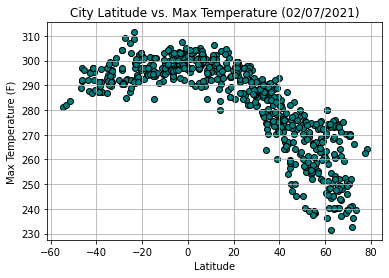

In [182]:
# Generate a scatter plot of Latitude vs. Temperature for cities in dataframe
lat_temp = city_weather_df[["Lat", "Max Temp"]]

plt.scatter(lat_temp ["Lat"], lat_temp["Max Temp"], 
            marker="o", facecolors="teal", edgecolors="black")
plt.grid(True)

plt.title("City Latitude vs. Max Temperature (02/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

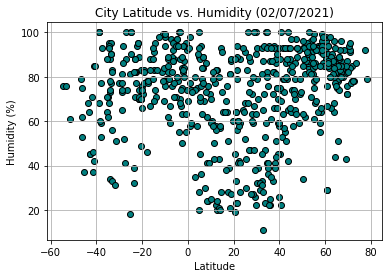

In [183]:
# Generate a scatter plot of Latitude vs. Temperature for cities in dataframe
lat_humidity = city_weather_df[["Lat", "Humidity"]]

plt.scatter(lat_humidity ["Lat"], lat_humidity["Humidity"], 
            marker="o", facecolors="teal", edgecolors="black")
plt.grid(True)

plt.title("City Latitude vs. Humidity (02/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

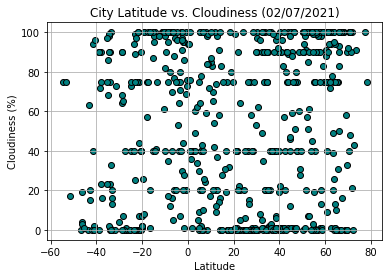

In [184]:
# Generate a scatter plot of Latitude vs. Temperature for cities in dataframe
lat_cloud = city_weather_df[["Lat", "Cloudiness"]]

plt.scatter(lat_cloud["Lat"], lat_cloud["Cloudiness"], 
            marker="o", facecolors="teal", edgecolors="black")
plt.grid(True)

plt.title("City Latitude vs. Cloudiness (02/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

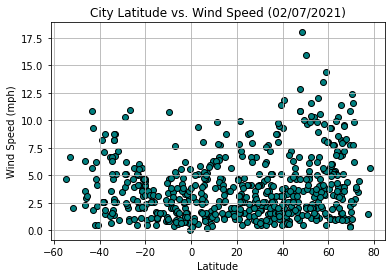

In [185]:
# Generate a scatter plot of Latitude vs. Temperature for cities in dataframe
lat_wind = city_weather_df[["Lat", "Wind Speed"]]

plt.scatter(lat_wind["Lat"], lat_wind["Wind Speed"], 
            marker="o", facecolors="teal", edgecolors="black")
plt.grid(True)

plt.title("City Latitude vs. Wind Speed (02/07/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8536126847201204


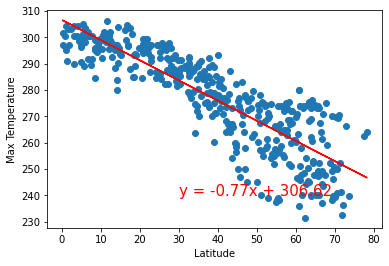

In [194]:
north_temp_lat = city_weather_df[["Lat", "Max Temp"]].loc[city_weather_df["Lat"] > 0, :]

x_values = north_temp_lat['Lat']
y_values = north_temp_lat['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.522605493354535


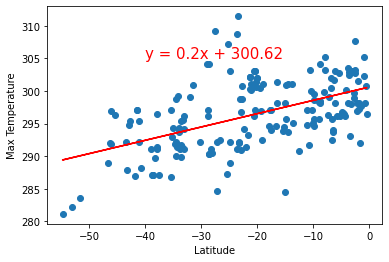

In [196]:
south_temp_lat = city_weather_df[["Lat", "Max Temp"]].loc[city_weather_df["Lat"] < 0, :]

x_values = south_temp_lat['Lat']
y_values = south_temp_lat['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.37289796381227414


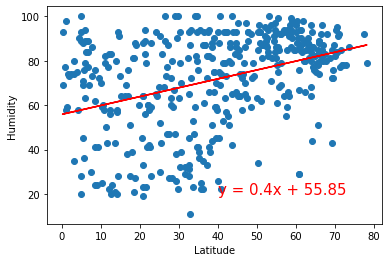

In [200]:
north_humid_lat = city_weather_df[["Lat", "Humidity"]].loc[city_weather_df["Lat"] > 0, :]

x_values = north_humid_lat['Lat']
y_values = north_humid_lat['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.30074571528440547


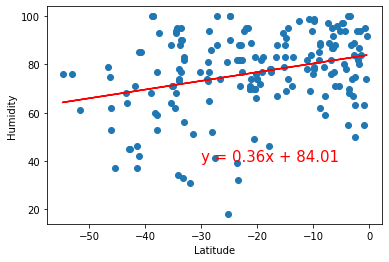

In [204]:
south_humid_lat = city_weather_df[["Lat", "Humidity"]].loc[city_weather_df["Lat"] < 0, :]

x_values = south_humid_lat['Lat']
y_values = south_humid_lat['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22336609769100174


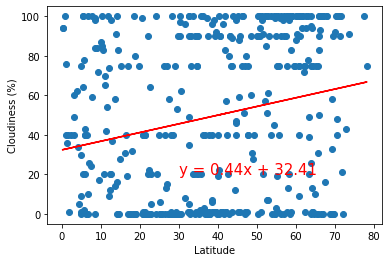

In [216]:
north_cloud_lat = city_weather_df[["Lat", "Cloudiness"]].loc[city_weather_df["Lat"] > 0, :]

x_values = north_cloud_lat['Lat']
y_values = north_cloud_lat['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.30780973865133127


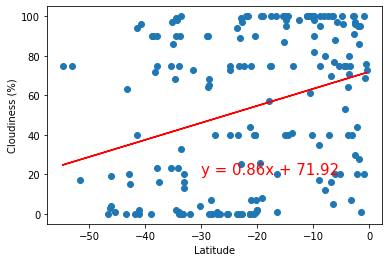

In [217]:
south_cloud_lat = city_weather_df[["Lat", "Cloudiness"]].loc[city_weather_df["Lat"] < 0, :]

x_values = south_cloud_lat['Lat']
y_values = south_cloud_lat['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22223355962911173


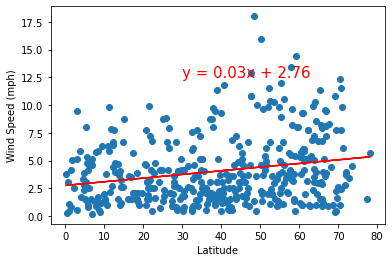

In [214]:
north_wind_lat = city_weather_df[["Lat", "Wind Speed"]].loc[city_weather_df["Lat"] > 0, :]

x_values = north_wind_lat['Lat']
y_values = north_wind_lat['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,12.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.3317728904460348


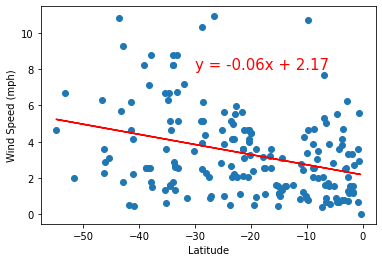

In [215]:
south_wind_lat = city_weather_df[["Lat", "Wind Speed"]].loc[city_weather_df["Lat"] < 0, :]

x_values = south_wind_lat['Lat']
y_values = south_wind_lat['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()